In [72]:
import random
import sys
import madjax
import numpy as np
import jax
import matplotlib.pyplot as plt


mj = madjax.MadJax('higgs4l')

random_variables = [0.2]*8

# Center of mass of the collision in GeV
matrix_element = mj.matrix_element(E_cm=125., process_name='Matrix_1_bbx_h_epemmupmum')
jacobian = mj.jacobian(E_cm = 125, process_name='Matrix_1_bbx_h_epemmupmum')


pars = {
    ("mass", 23): 9.918800e01,
    ("sminputs", 2): 1.166390e-05,
    ("mass", 25): 1.250000e+02
}
v,p = matrix_element(pars, random_variables)
print("ME:", v)
print("ME prime:", p)

ME: 1.0274054820975642e-22
ME prime: {('mass', 23): DeviceArray(2.50700231e-24, dtype=float64), ('mass', 25): DeviceArray(-1.64384877e-24, dtype=float64), ('sminputs', 2): DeviceArray(4.80858946e-17, dtype=float64)}


In [75]:
matrix_element({},random_variables)

(DeviceArray(6.07234323e-07, dtype=float64), {})

In [82]:
parvals = np.linspace(50,150,2*3*4*5)
a = [matrix_element({("mass", 23): x}, random_variables) for x in parvals]
a = np.asarray([(x[0],x[1][('mass',23)]) for x in a])

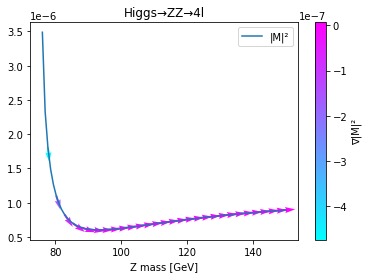

In [84]:
every_n = 3
plt.plot(parvals,a[:,0],label = '|M|²')
QV1 = plt.quiver(
    parvals[::every_n],
    a[::every_n,0],
    np.ones_like(a[::every_n,1]),
    a[::every_n,1],
    a[::every_n,1],
    angles = 'xy',
    units = 'xy',
    cmap = 'cool',
)
plt.colorbar(label = '∇|M|²')
# plt.quiverkey(QV1, 0.8,0.1, 1.0, '∇|M|²')
plt.title('Higgs→ZZ→4l')
plt.legend()
plt.xlabel('Z mass [GeV]')
plt.xlabel('|M|²')
plt.savefig('higgs4l.png', dpi = 300)